# 1. Импорт библиотек и загрузка данных

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Загружаем Excel-файл
file_path = "Тестирование ЦКА, аналитик данных 2025.01.01 (1) (1) (1) (1) (2) (1) (1).xlsx"
xls = pd.ExcelFile(file_path)

# Смотрим, какие листы есть
xls.sheet_names

['Задача', 'Исходные данные', 'Подразделения']

In [22]:
# Загружаем основной лист с данными
df_raw = pd.read_excel(xls, sheet_name="Исходные данные")

# Чтение справочника подразделений
df_depts = pd.read_excel(xls, sheet_name="Подразделения")

# Объединяем с добавлением названия подразделения
df = df_raw.merge(
    df_depts,
    how='left',
    left_on="Код подразделения работника ВШЭ",
    right_on="Код подразделения"
)

# Показываем первые строки
df.head()

,Код работника,Дата рождения,Категория персонала,Ученая степень,Кампус работника,Трудовые отношения с НИУ ВШЭ,Код подразделения работника ВШЭ,Должность,Наименование программы,Тип программы,Стоимость участия в программе,"Документ, подтверждающий участие в программе","Страна, где организована программа",Наименование принимающей организации,Тип организации,Дата начала программы,Дата окончания программы,Подразделение,Код подразделения
0,OStaM-0308,NaN,НПР,кандидат наук,Москва,штатный сотрудник,05.03.,старший научный сотрудник,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",0.000000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42693,42691,Институт проблем ценообразования и регулирован...,05.03.
1,OStaM-1601,NaN,НПР,PhD,Москва,штатный сотрудник,02.01.35.,Доцент,"Научный семинар, Университет Болоньи «Производ...","Участие в научных мероприятиях (конференция, с...",12507.798738,приглашение к участию в научной/методической к...,Италия,Университет Болоньи,образовательная организация высшего образования,42088,42102,научно-учебная лаборатория исследований рынка ...,02.01.35.
2,OStaM-0410,NaN,НПР,нет степени,Москва,штатный сотрудник,02.33.03.,научный сотрудник,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",24680.000000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42328,42328,институт экономики транспорта и транспортной п...,02.33.03.
3,OStaM-0510,NaN,НПР,доктор наук,Москва,штатный сотрудник,05.15.,заведующий отделом,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",26992.077930,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42328,42328,Институт статистических исследований и экономи...,05.15.
4,OStaM-0787,NaN,НПР,нет степени,Москва,штатный сотрудник,05.15.,научный сотрудник,Курс лекций Национального исследовательского у...,"Участие в научных мероприятиях (конференция, с...",3060.320000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42314,42315,Институт статистических исследований и экономи...,05.15.


In [23]:
df_raw.columns = df_raw.columns.str.strip()

## 1.2. Проверка на ошибки

In [24]:
# Пропущенные значения
df_raw.isnull().sum()

# Дубликаты
df_raw.duplicated().sum()

# Уникальные значения в колонке "Страна, где организована программа"
df_raw["Страна, где организована программа"].value_counts()

Российская Федерация                     405
Германия                                  11
Великобритания                            10
США                                        8
Cоединённые Штаты Америки                  8
Соединенные Штаты Америки                  8
Италия                                     7
Бельгия                                    5
Франция                                    5
Финляндия                                  4
Федеративная Республика Бразилия           4
Королевство Норвегия                       4
Государство Израиль                        4
Польша                                     4
Турецкая Республика                        3
Китай                                      3
Великое Герцогство Люксембург              3
Швейцарская Конфедерация                   3
Украина                                    2
Япония                                     2
Румыния                                    2
Австрийская Республика                     2
Нидерланды

## 1.3. Добавление справочника подразделений

In [25]:
# 1. Очищаем возможные пробелы в названиях колонок
df_raw.columns = df_raw.columns.str.strip()
df_depts.columns = df_depts.columns.str.strip()

# 2. Переименуем колонку 'Подразделение' в df_depts,
# чтобы после merge она сразу была 'Наименование подразделения'
df_depts = df_depts.rename(
    columns={'Подразделение': 'Наименование подразделения'}
)

# 3. Делаем left-join, указывая разные имена колонок
df = pd.merge(
    df_raw,
    df_depts,
    how='left',
    left_on='Код подразделения работника ВШЭ',
    right_on='Код подразделения'
)

# 4. (Опционально) Удаляем вспомогательный столбец 'Код подразделения'
df = df.drop(columns=['Код подразделения'])

# 5. Проверяем результат
df.head()

,Код работника,Дата рождения,Категория персонала,Ученая степень,Кампус работника,Трудовые отношения с НИУ ВШЭ,Код подразделения работника ВШЭ,Должность,Наименование программы,Тип программы,Стоимость участия в программе,"Документ, подтверждающий участие в программе","Страна, где организована программа",Наименование принимающей организации,Тип организации,Дата начала программы,Дата окончания программы,Наименование подразделения
0,OStaM-0308,NaN,НПР,кандидат наук,Москва,штатный сотрудник,05.03.,старший научный сотрудник,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",0.000000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42693,42691,Институт проблем ценообразования и регулирован...
1,OStaM-1601,NaN,НПР,PhD,Москва,штатный сотрудник,02.01.35.,Доцент,"Научный семинар, Университет Болоньи «Производ...","Участие в научных мероприятиях (конференция, с...",12507.798738,приглашение к участию в научной/методической к...,Италия,Университет Болоньи,образовательная организация высшего образования,42088,42102,научно-учебная лаборатория исследований рынка ...
2,OStaM-0410,NaN,НПР,нет степени,Москва,штатный сотрудник,02.33.03.,научный сотрудник,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",24680.000000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42328,42328,институт экономики транспорта и транспортной п...
3,OStaM-0510,NaN,НПР,доктор наук,Москва,штатный сотрудник,05.15.,заведующий отделом,Научный семинар Национального исследовательско...,"Участие в научных мероприятиях (конференция, с...",26992.077930,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42328,42328,Институт статистических исследований и экономи...
4,OStaM-0787,NaN,НПР,нет степени,Москва,штатный сотрудник,05.15.,научный сотрудник,Курс лекций Национального исследовательского у...,"Участие в научных мероприятиях (конференция, с...",3060.320000,нет подтверждающего документа,Российская Федерация,НИУ ВШЭ,образовательная организация высшего образования,42314,42315,Институт статистических исследований и экономи...


# 2. Добавим необходимые столбцы 

## 2.1. Добавим столбец с длительностью поездки

In [26]:
# Очистка и преобразование дат

# Удалим лишние пробелы и символы, заменим мусор
df['Дата начала программы'] = df['Дата начала программы'].astype(str).str.strip().replace(['–', '-', 'nan', ''], pd.NA)
df['Дата окончания программы'] = df['Дата окончания программы'].astype(str).str.strip().replace(['–', '-', 'nan', ''], pd.NA)

# Преобразуем в datetime с игнорированием ошибок
df['Дата начала программы'] = pd.to_datetime(df['Дата начала программы'], errors='coerce')
df['Дата окончания программы'] = pd.to_datetime(df['Дата окончания программы'], errors='coerce')

# Добавим столбец с длительностью поездки в днях
df['Длительность поездки (дней)'] = (df['Дата окончания программы'] - df['Дата начала программы']).dt.days

# Проверим результат
df[['Дата начала программы', 'Дата окончания программы', 'Длительность поездки (дней)']].head()

C:\Users\79017\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29.10.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\79017\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.11.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\79017\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24.11.2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\79017\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.10.2010' in DD/MM/YYYY format. Provide format or specif

,Дата начала программы,Дата окончания программы,Длительность поездки (дней)
0,NaT,NaT,NaN
1,NaT,NaT,NaN
2,NaT,NaT,NaN
3,NaT,NaT,NaN
4,NaT,NaT,NaN


In [27]:
# Предполагаем, что df уже получен после merge
# Убедимся, что даты в формате datetime
df['Дата начала программы'] = pd.to_datetime(df['Дата начала программы'])
df['Дата окончания программы'] = pd.to_datetime(df['Дата окончания программы'])

# Вычисляем длительность в днях
df['Длительность (дней)'] = (df['Дата окончания программы'] - df['Дата начала программы']).dt.days

# Быстрая проверка
df[['Дата начала программы', 'Дата окончания программы', 'Длительность (дней)']].head()

,Дата начала программы,Дата окончания программы,Длительность (дней)
0,NaT,NaT,NaN
1,NaT,NaT,NaN
2,NaT,NaT,NaN
3,NaT,NaT,NaN
4,NaT,NaT,NaN


## 2.2. Подразделение с самой большой средней длительностью поездок

In [28]:
# Группируем по наименованию подразделения и считаем среднюю длительность
avg_duration_by_dept = df.groupby('Наименование подразделения')['Длительность поездки (дней)'].mean().sort_values(ascending=False)

# Посмотрим топ-5
avg_duration_by_dept.head()

Наименование подразделения
Научно-учебная лаборатория когнитивных исследований               160.000000
институт региональных исследований и городского планирования      160.000000
Московский институт электроники и математики им. А.Н. Тихонова     81.500000
НИУ ВШЭ - Санкт-Петербург                                          52.666667
департамент психологии                                             30.000000
Name: Длительность поездки (дней), dtype: float64

### 2.2.1. Визуализация 

C:\Users\79017\AppData\Local\Temp\ipykernel_66132\1944062938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_dept.head(5).values, y=avg_duration_by_dept.head(5).index, palette='Blues_d')


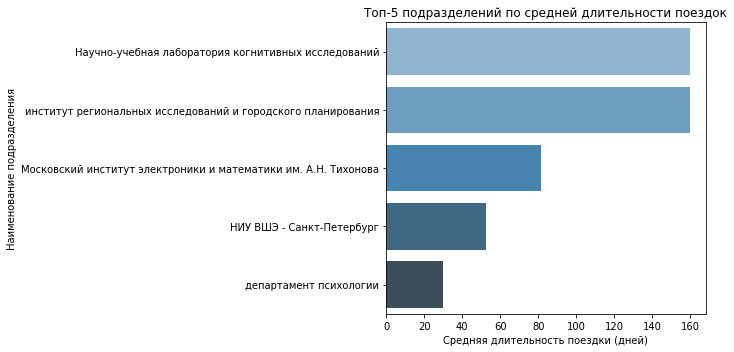

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_duration_by_dept.head(5).values, y=avg_duration_by_dept.head(5).index, palette='Blues_d')
plt.xlabel('Средняя длительность поездки (дней)')
plt.title('Топ-5 подразделений по средней длительности поездок')
plt.tight_layout()
plt.show()

## 2.3. Топ-5 подразделений московского кампуса по академической мобильности

### 2.3.1. Посмотрим уникальные значения типа программы

In [30]:
df['Тип программы'].unique()

array(['Участие в научных мероприятиях (конференция, семинар, другое)',
       'ПК',
       'Продвижение образовательных продуктов и научных исследований НИУ ВШЭ (в т.ч. формирование партнерств, проведение рекламных акций и т.п.)',
       'Участие в образовательных мероприятиях (семинары; обмен опытом)',
       'Участие в научно-образовательной школе',
       'Прохождение краткосрочного обучения (обучающие семинары, мастер-классы и т.п.)',
       'стажировка'], dtype=object)

In [31]:
# Фильтруем по Москве
df_moscow = df[df['Кампус работника'] == 'Москва']

# Считаем количество поездок по подразделениям
top5_moscow = (
    df_moscow['Наименование подразделения']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Подразделение', 'Наименование подразделения': 'Число поездок'})
)

# Показываем результат
print("🔝 Топ-5 подразделений московского кампуса по числу поездок:")
print(top5_moscow.to_string(index=False))

🔝 Топ-5 подразделений московского кампуса по числу поездок:
                                                          Подразделение  Число поездок
Институт проблем ценообразования и регулирования естественных монополий             90
                Институт статистических исследований и экономики знаний             71
                  Институт государственного и муниципального управления             42
                                              НИУ ВШЭ - Санкт-Петербург             27
                                     Центр фундаментальных исследований             19


C:\Users\79017\AppData\Local\Temp\ipykernel_66132\3522899272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_moscow, x="Число поездок", y="Подразделение", palette="Blues_d")


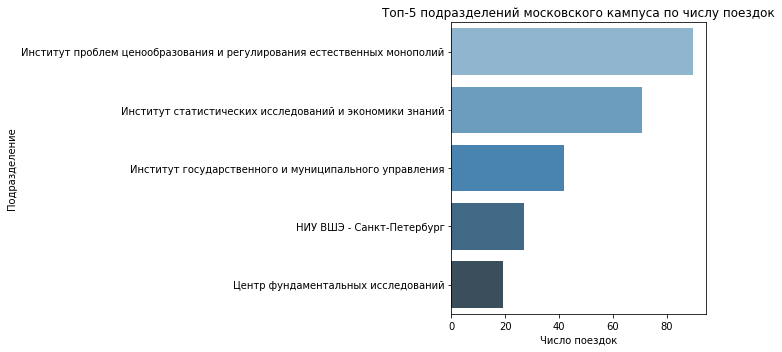

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_moscow, x="Число поездок", y="Подразделение", palette="Blues_d")
plt.title("Топ-5 подразделений московского кампуса по числу поездок")
plt.xlabel("Число поездок")
plt.ylabel("Подразделение")
plt.tight_layout()
plt.show()

# 3. Визуализация данных

## 3.1. Визуализация по странам

C:\Users\79017\AppData\Local\Temp\ipykernel_66132\1620953352.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="Число поездок", y="Страна", palette="coolwarm")


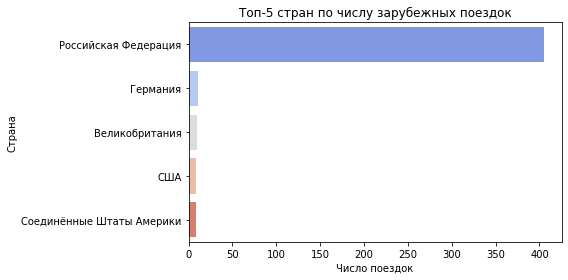

In [33]:
# Строим топ-5 стран
top_countries = (
    df['Страна, где организована программа']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Страна', 'Страна, где организована программа': 'Число поездок'})
)

# Визуализация
plt.figure(figsize=(8, 4))
sns.barplot(data=top_countries, x="Число поездок", y="Страна", palette="coolwarm")
plt.title("Топ-5 стран по числу зарубежных поездок")
plt.xlabel("Число поездок")
plt.ylabel("Страна")
plt.tight_layout()

# Сохраняем график
plt.savefig("топ_5_стран.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.2. Топ‑5 подразделений по средней длительности поездок

C:\Users\79017\AppData\Local\Temp\ipykernel_66132\3007350967.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_duration, x="Длительность (дней)", y="Наименование подразделения", palette="crest")


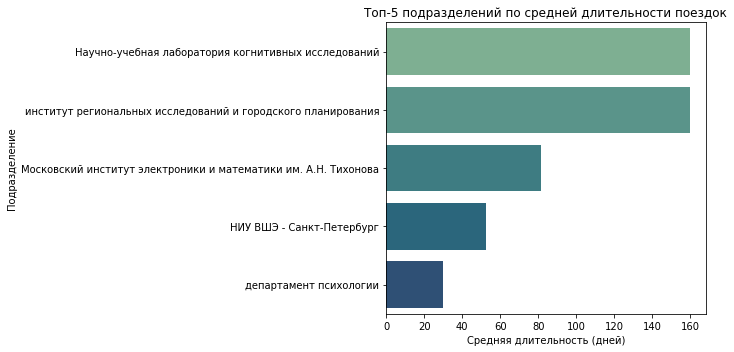

In [40]:
# Топ-5 подразделений по средней длительности
top_avg_duration = (
    df.groupby('Наименование подразделения')['Длительность (дней)']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(data=top_avg_duration, x="Длительность (дней)", y="Наименование подразделения", palette="crest")
plt.title("Топ-5 подразделений по средней длительности поездок")
plt.xlabel("Средняя длительность (дней)")
plt.ylabel("Подразделение")
plt.tight_layout()

# Сохраняем график
plt.savefig("средняя_длительность.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.3. Топ‑5 подразделений московского кампуса по числу поездок

C:\Users\79017\AppData\Local\Temp\ipykernel_66132\1766703253.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_moscow, x="Число поездок", y="Подразделение", palette="viridis")


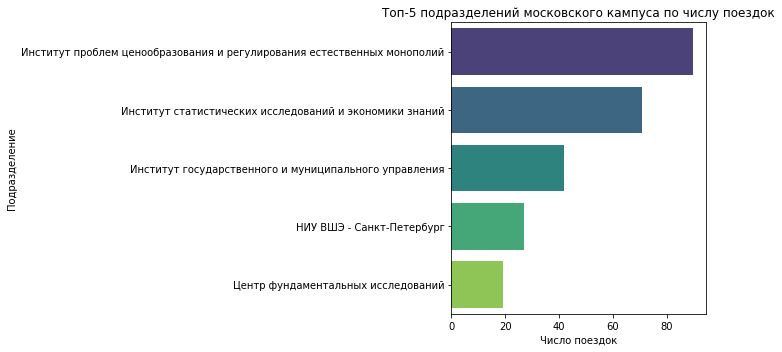

In [41]:
# Фильтруем только московский кампус
df_moscow = df[df['Кампус работника'] == 'Москва']

# Считаем число поездок по подразделениям
top5_moscow = (
    df_moscow['Наименование подразделения']
    .value_counts()
    .head(5)
    .reset_index()
    .rename(columns={'index': 'Подразделение', 'Наименование подразделения': 'Число поездок'})
)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(data=top5_moscow, x="Число поездок", y="Подразделение", palette="viridis")
plt.title("Топ-5 подразделений московского кампуса по числу поездок")
plt.xlabel("Число поездок")
plt.ylabel("Подразделение")
plt.tight_layout()

# Сохраняем график
plt.savefig("топ_5_москва.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
from pptx import Presentation
from pptx.util import Inches

# Создаём презентацию
prs = Presentation()

def add_slide(title, image_path, comment):
    slide = prs.slides.add_slide(prs.slide_layouts[5])  # Пустой слайд
    title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
    title_frame = title_shape.text_frame
    title_frame.text = title

    # Добавляем картинку
    slide.shapes.add_picture(image_path, Inches(1), Inches(1.2), width=Inches(8))

    # Добавляем подпись
    comment_box = slide.shapes.add_textbox(Inches(0.5), Inches(6.7), Inches(9), Inches(1))
    comment_frame = comment_box.text_frame
    comment_frame.text = comment

# Добавляем 3 слайда (заменили имя файла картинки)
add_slide("Топ-5 стран по количеству поездок", "топ_5_стран.png", "Сотрудники ВШЭ чаще всего ездили в эти страны.")
add_slide("Подразделения с самой длинной средней поездкой", "средняя_длительность.png", "Эти подразделения отправляют сотрудников в более продолжительные командировки.")
add_slide("Топ-5 подразделений московского кампуса", "топ_5_москва.png", "Наиболее активные по числу поездок подразделения в Москве.")

# Сохраняем файл
prs.save("Презентация_аналитика.pptx")

print("✅ Презентация сохранена: Презентация_аналитика.pptx")


✅ Презентация сохранена: Презентация_аналитика.pptx


In [43]:
with pd.ExcelWriter("Результаты_анализа.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Исходные данные", index=False)
    top_countries.to_excel(writer, sheet_name="Топ-страны", index=False)
    avg_duration_by_dept.to_excel(writer, sheet_name="Средняя длительность", index=False)
    top5_moscow.to_excel(writer, sheet_name="Топ-5 Москва", index=False)